In [1]:
#Load all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from polars import count

In [2]:
#Load dataset into df
df = pd.read_csv('recruitmentdataset-2022-1.3.csv')

In [3]:
#We are group 1 so Company A -> Cut out all data not company A
is_company_A = df['company'] == 'A'
df_A = df[is_company_A]

**Start Of The One hot Encoding Steps**

In [4]:
# Import for Knn and one-hot-encoding
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [5]:
# one hot encoding to convert 'ind-degree' to numerical data
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_A[['ind-degree']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'gender' to numerical data
transformed = ohe.fit_transform(df_A[['gender']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'nationality' to numerical data
transformed = ohe.fit_transform(df_A[['nationality']])
# and add three new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()
# one hot encoding to convert 'sport' to numerical data
transformed = ohe.fit_transform(df_A[['sport']])
# and add seven new columns to the dataset
df_A[ohe.categories_[0]] = transformed.toarray()

C:\Users\Alexander vd Linden\AppData\Local\Temp\ipykernel_3976\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A[ohe.categories_[0]] = transformed.toarray()
C:\Users\Alexander vd Linden\AppData\Local\Temp\ipykernel_3976\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A[ohe.categories_[0]] = transformed.toarray()
C:\Users\Alexander vd Linden\AppData\Local\Temp\ipykernel_3976\1178553710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

**Start Of The Data Tranformation/Normalization Steps**

In [6]:
# Make a copy from the original dataset as to not overwrite data
df_A_new = df_A.copy()
# Turn the 'decision' column to nuremic values (0 and 1)
df_A_new['decision'] = df_A_new['decision'].astype(int)
# Turn the 'ind-programming_exp' column to nuremic values (0 and 1)
df_A_new['ind-programming_exp'] = df_A_new['ind-programming_exp'].astype(int)
# Turn the 'ind-international_exp' column to nuremic values (0 and 1)
df_A_new['ind-international_exp'] = df_A_new['ind-international_exp'].astype(int)
# Turn the 'ind-entrepeneur_exp' column to nuremic values (0 and 1)
df_A_new['ind-entrepeneur_exp'] = df_A_new['ind-entrepeneur_exp'].astype(int)
# Turn the 'ind-exact_study' column to nuremic values (0 and 1)
df_A_new['ind-exact_study'] = df_A_new['ind-exact_study'].astype(int)
# Turn the 'ind-debateclub' column to nuremic values (0 and 1)
df_A_new['ind-debateclub'] = df_A_new['ind-debateclub'].astype(int)
# Noramlize the 'ind-languages' column to a nuremic value (between 0 and 1)
df_A_new['ind-languages'] = (df_A_new['ind-languages']-df_A_new['ind-languages'] .min())/(df_A_new['ind-languages'] .max()-df_A_new['ind-languages'] .min())
# Noramlize the 'ind-university_grade' column to a nuremic value (between 0 and 1)
df_A_new['ind-university_grade'] = (df_A_new['ind-university_grade']-df_A_new['ind-university_grade'] .min())/(df_A_new['ind-university_grade'] .max()-df_A_new['ind-university_grade'] .min())
# Noramlize the 'ind-age' column to a nuremic value (between 0 and 1)
df_A_new['age'] = (df_A_new['age']-df_A_new['age'] .min())/(df_A_new['age'] .max()-df_A_new['age'] .min())
# Create a new dataset with only the indicators and the 'decision' column to create the corralation table
df_corrs = df_A_new[['decision', 'ind-languages', 'ind-debateclub', 'ind-university_grade', 'ind-programming_exp', 'ind-international_exp', 'ind-entrepeneur_exp', 'ind-exact_study']]

**Start Of The Trainig/Validation/Test Splitting For M2 (MLPClassifier)**

Create training/testing/validation sets for different number of features

In [7]:
# Create a training/test split and add features to be used for knn.
# 800 values for training/validation and 200 values for test set.
# Take 64% percent of the original dataset for the training set
train_set = df_A_new[:640]
# Take 16% percent of the original dataset for the validation set
val_set = df_A_new[640:800]
# Take 20% percent of the original dataset for the test set (200 rows for testing out of 2000 rows)
test_set = df_A_new[800:]

# Three features
x_train3 = train_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub']]
y_train3 = train_set["decision"]
x_val3 = val_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub']]
y_val3 = val_set["decision"]
x_test3 = test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub']]
y_test3 = test_set["decision"]

# four features
x_train4 = train_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_train4 = train_set["decision"]
x_val4 = val_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_val4 = val_set["decision"]
x_test4 = test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_test4 = test_set["decision"]

# five features
x_train5 = train_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp', 'ind-university_grade']]
y_train5 = train_set["decision"]
x_val5 = val_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp', 'ind-university_grade']]
y_val5 = val_set["decision"]
x_test5 = test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp', 'ind-university_grade']]
y_test5 = test_set["decision"]

In [8]:
#Nr of neighbors, input a list here
list_neighbors = np.arange(1,21,1)
#function for knn, returns scoring for every value in list of neighbors.
def knnClassifier(neighbors, x_train,y_train,x_test,y_test):
    scores = []
    for neighbor in neighbors:
      knn = KNeighborsClassifier(neighbor)
      # Train the model using the training sets
      knn.fit(x_train,y_train)
      #Predict Output
      y_pred= knn.predict(x_test)
      scores.append(metrics.accuracy_score(y_test, y_pred))
    return scores
#     x=1
#     for score in scores:
#       print(x, "Accuracy:", score)
#       x+=1

In [9]:
# Get a list of accuracy values from 1 to 20 knn for 3/4/5 features.
feat_accuracy3 = knnClassifier(list_neighbors,x_train3, y_train3, x_val3, y_val3)
feat_accuracy4 = knnClassifier(list_neighbors,x_train4, y_train4, x_val4, y_val4)
feat_accuracy5 = knnClassifier(list_neighbors,x_train5, y_train5, x_val5, y_val5)

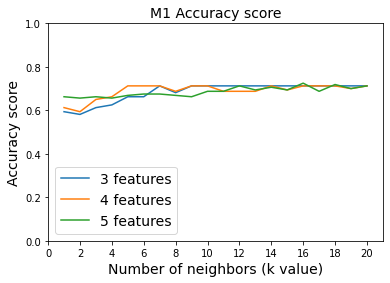

In [10]:
# Plot with different nr of features and with a range of k values
# sns.set(font_scale=1)
x = np.arange(0,22,2)
plt.plot(list_neighbors, feat_accuracy3, label = "3 features",linestyle="-")
plt.plot(list_neighbors, feat_accuracy4, label = "4 features",linestyle="-")
plt.plot(list_neighbors, feat_accuracy5, label = "5 features",linestyle="-")
plt.title('M1 Accuracy score',fontsize= 14)
plt.xlabel('Number of neighbors (k value)',fontsize= 14)
plt.ylabel('Accuracy score',fontsize= 14)
plt.xlim(0, 21)
plt.xticks(x)
plt.ylim(0,1)
plt.legend(fontsize= 14)
plt.savefig('test.jpg', transparent=False)
plt.show()

0.72


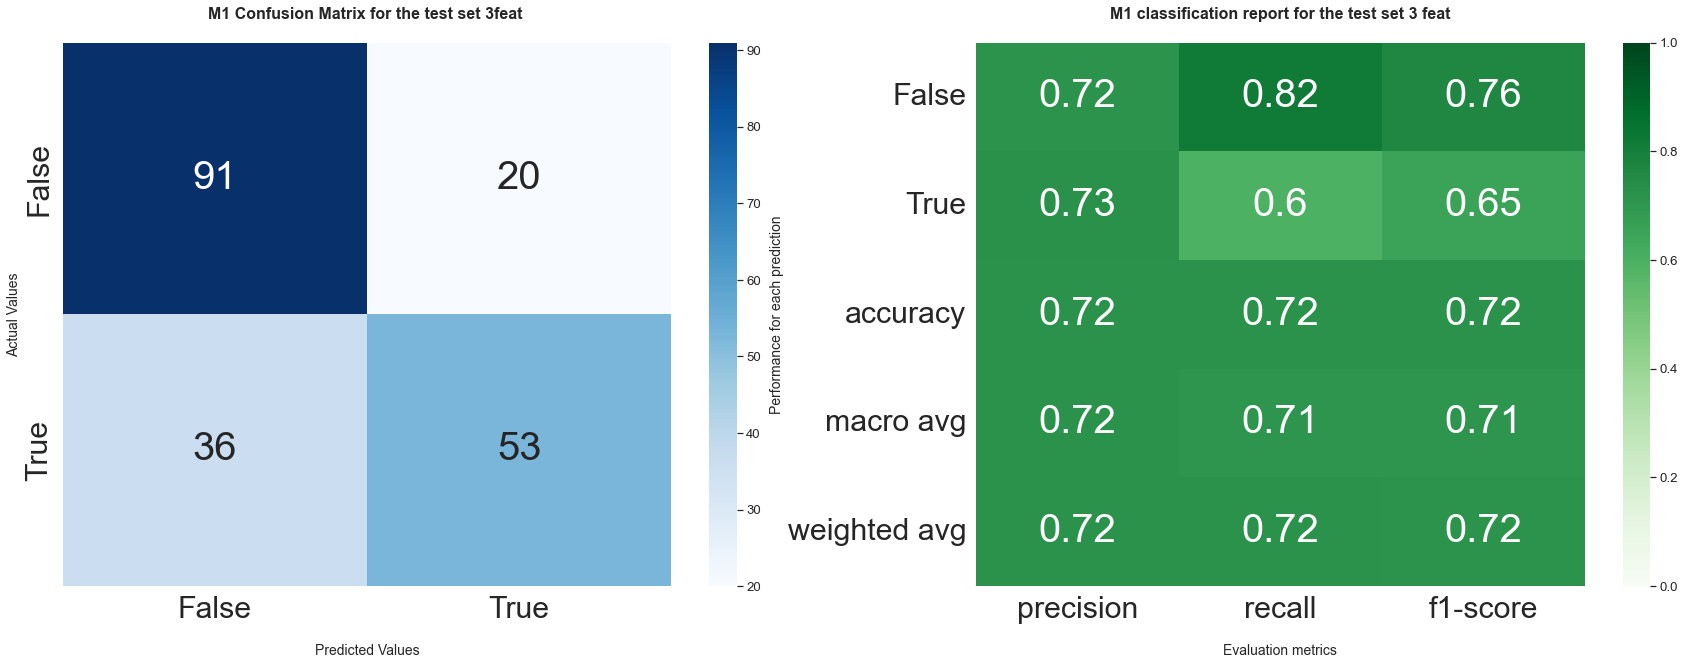

In [11]:
sns.set(font_scale = 2.75)
# 3 features
#Call the knn function with relevant inputs. Will print the score
M1 = KNeighborsClassifier(n_neighbors=7)
M1.fit(x_train3, y_train3)
M1_prediction3 = M1.predict(x_test3)
print(M1.score(x_test3, y_test3))
clf_report3 = classification_report(y_test3,M1_prediction3, output_dict=True, target_names=['False', 'True'])
cf_matrix = confusion_matrix(y_test3,M1_prediction3)

# Display the visualization of the Confusion Matrix.
fig, ax = plt.subplots(1, 2, figsize=(30,10))
sns.set(font_scale = 1.2)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax[0],annot_kws={'fontsize': 40})
ax[0].set_title('M1 Confusion Matrix for the test set 3feat \n', fontsize= 16, fontweight='bold')
ax[0].set_xlabel('\nPredicted Values', fontsize= 14)
ax[0].set_ylabel('Actual Values', fontsize= 14)
ax[0].xaxis.set_ticklabels(['False','True'])
ax[0].yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(clf_report3).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1],annot_kws={'fontsize': 40})
ax[1].set_title('M1 classification report for the test set 3 feat\n', fontsize= 16, fontweight='bold')
ax[1].set_xlabel('\nEvaluation metrics', fontsize= 14)
ax[1].set_ylabel('Performance for each prediction', fontsize= 14)
plt.show()

0.72


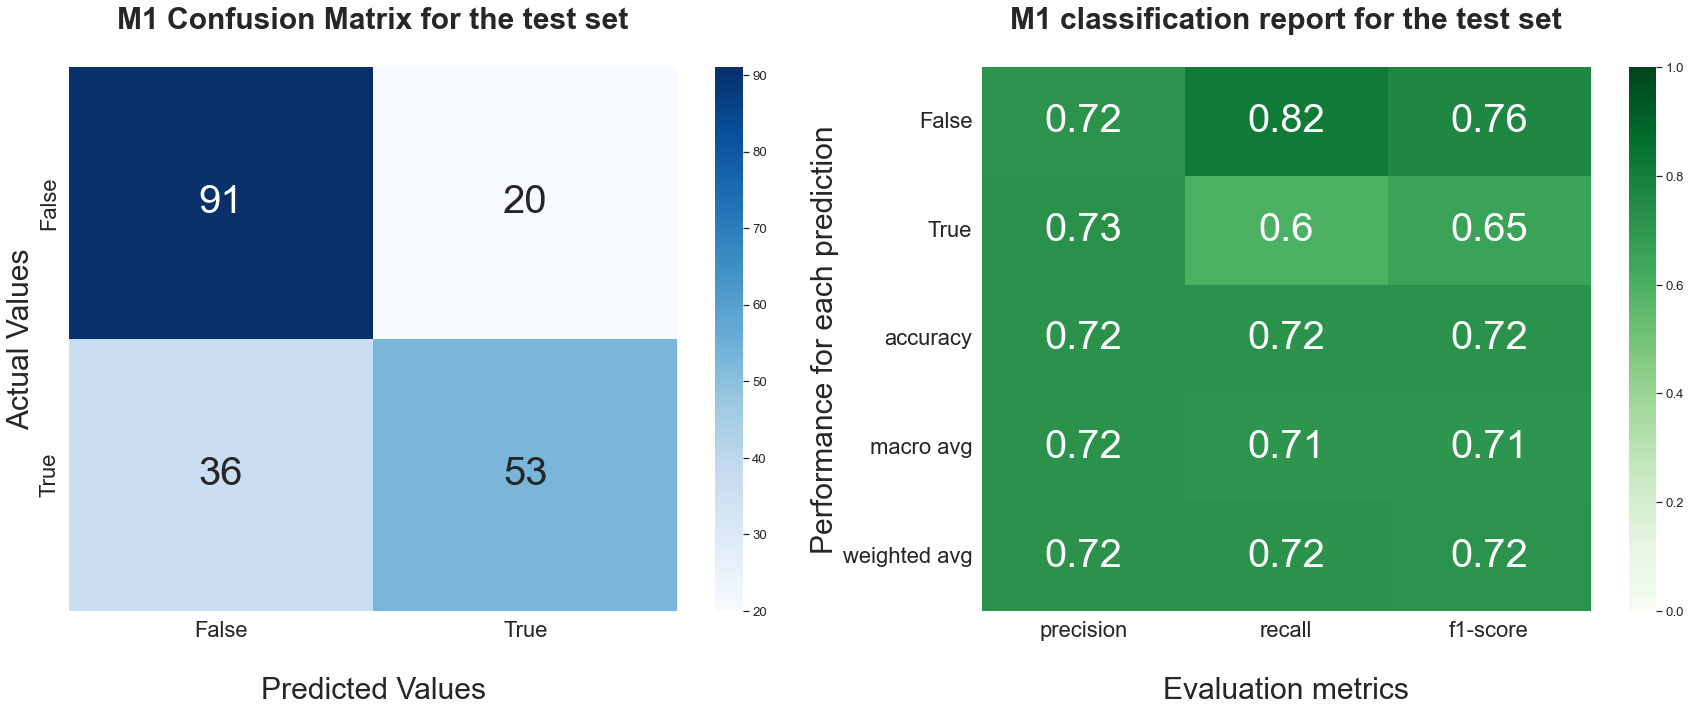

In [12]:
sns.set(font_scale = 2)
# 4 features
#Call the knn function with relevant inputs. Will print the score
M1 = KNeighborsClassifier(n_neighbors=7)
M1.fit(x_train4, y_train4)
M1_prediction4 = M1.predict(x_test4)
print(M1.score(x_test4, y_test4))
clf_report4 = classification_report(y_test4,M1_prediction4, output_dict=True, target_names=['False', 'True'])
cf_matrix = confusion_matrix(y_test4,M1_prediction4)

# Display the visualization of the Confusion Matrix.
fig, ax = plt.subplots(1, 2, figsize=(30,10))
sns.set(font_scale = 1.2)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax[0],annot_kws={'fontsize': 40})
ax[0].set_title('M1 Confusion Matrix for the test set\n', fontsize= 30, fontweight='bold')
ax[0].set_xlabel('\nPredicted Values', fontsize= 30)
ax[0].set_ylabel('Actual Values', fontsize= 30)
ax[0].xaxis.set_ticklabels(['False','True'])
ax[0].yaxis.set_ticklabels(['False','True'])
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(clf_report4).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1],annot_kws={'fontsize': 40})
ax[1].set_title('M1 classification report for the test set\n', fontsize= 30, fontweight='bold')
ax[1].set_xlabel('\nEvaluation metrics', fontsize= 30)
ax[1].set_ylabel('Performance for each prediction', fontsize= 30)
plt.show()

0.705


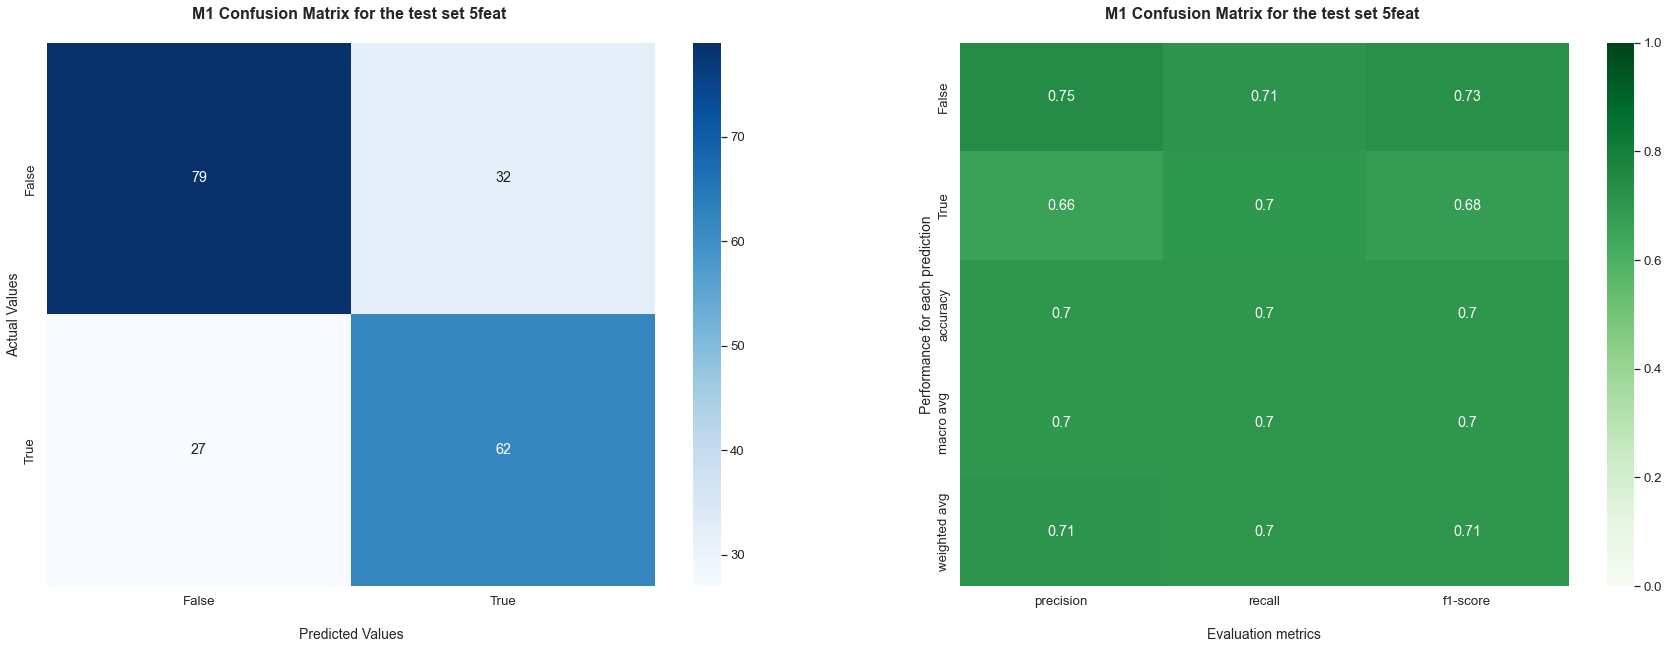

In [13]:
# 5 features
#Call the knn function with relevant inputs. Will print the score
M1_5 = KNeighborsClassifier(n_neighbors=7)
M1_5.fit(x_train5, y_train5)
M1_prediction5 = M1_5.predict(x_test5)
print(M1_5.score(x_test5, y_test5))
clf_report5 = classification_report(y_test5,M1_prediction5, output_dict=True, target_names=['False', 'True'])
cf_matrix = confusion_matrix(y_test5,M1_prediction5)

# Display the visualization of the Confusion Matrix.
fig, ax = plt.subplots(1, 2, figsize=(30,10))
sns.set(font_scale = 1.2)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax[0])
ax[0].set_title('M1 Confusion Matrix for the test set 5feat \n', fontsize= 16, fontweight='bold')
ax[0].set_xlabel('\nPredicted Values', fontsize= 14)
ax[0].set_ylabel('Actual Values', fontsize= 14)
ax[0].xaxis.set_ticklabels(['False','True'])
ax[0].yaxis.set_ticklabels(['False','True'])
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(clf_report5).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1])
ax[1].set_title('M1 Confusion Matrix for the test set 5feat \n', fontsize= 16, fontweight='bold')
ax[1].set_xlabel('\nEvaluation metrics', fontsize= 14)
ax[1].set_ylabel('Performance for each prediction', fontsize= 14)
plt.show()

Save the results for the M2 in a CSV

In [14]:
M1_val_results_dict = {'Id':test_set['Id'],
                        'M1 Prediction': M1.predict(x_test4),
                        'Actual Hiring Decision': y_test4}
M1_val_results_df = pd.DataFrame(M1_val_results_dict) 
M1_val_results_df.to_csv("M1_val_results_df.csv")

**Start Of Testing SubGroups For Indicator = gender**

In [15]:
#Fairness evalutation based on gender for 4feature model
#split the testset into male female and other
is_male_test_set = test_set['gender'] == 'male'
male_test_set = test_set[is_male_test_set]

is_female_test_set = test_set['gender'] == 'female'
female_test_set = test_set[is_female_test_set]

is_other_test_set = test_set['gender'] == 'other'
other_test_set = test_set[is_other_test_set]

x_test_male = male_test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_test_male = male_test_set["decision"]

x_test_female = female_test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_test_female = female_test_set["decision"]

x_test_other = other_test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_test_other = other_test_set["decision"]

In [16]:
# male subgroup
M1 = KNeighborsClassifier(n_neighbors=7)
M1.fit(x_train4, y_train4)
M1_prediction4 = M1.predict(x_test_male)
print(M1.score(x_test_male, y_test_male))
males_clf_report = classification_report(y_test_male,M1_prediction4, output_dict=True, target_names=['False', 'True'])
males_cf_matrix = confusion_matrix(y_test_male,M1_prediction4)

0.7232142857142857


In [17]:
# female subgroup
M1 = KNeighborsClassifier(n_neighbors=7)
M1.fit(x_train4, y_train4)
M1_prediction4 = M1.predict(x_test_female)
print(M1.score(x_test_female, y_test_female))
females_clf_report = classification_report(y_test_female,M1_prediction4, output_dict=True, target_names=['False', 'True'])
females_cf_matrix = confusion_matrix(y_test_female,M1_prediction4)

0.7160493827160493


In [18]:
# other subgroup
M1 = KNeighborsClassifier(n_neighbors=7)
M1.fit(x_train4, y_train4)
M1_prediction4 = M1.predict(x_test_other)
print(M1.score(x_test_other, y_test_other))
others_clf_report = classification_report(y_test_other,M1_prediction4, output_dict=True, target_names=['False', 'True'])
others_cf_matrix = confusion_matrix(y_test_other,M1_prediction4)

0.7142857142857143


In [19]:
#Fairness evalutation based on nationality for 4feature model
#split the testset into dutch, german and belgian
is_dutch_test_set = test_set['nationality'] == 'Dutch'
dutch_test_set = test_set[is_dutch_test_set]

is_german_test_set = test_set['nationality'] == 'German'
german_test_set = test_set[is_german_test_set]

is_belgian_test_set = test_set['nationality'] == 'Belgian'
belgian_test_set = test_set[is_belgian_test_set]

x_test_dutch = dutch_test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_test_dutch = dutch_test_set["decision"]

x_test_german = german_test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_test_german = german_test_set["decision"]

x_test_belgian = belgian_test_set.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
y_test_belgian = belgian_test_set["decision"]

In [20]:
# dutch subgroup
M1 = KNeighborsClassifier(n_neighbors=7)
M1.fit(x_train4, y_train4)
M1_prediction4 = M1.predict(x_test_dutch)
print(M1.score(x_test_dutch, y_test_dutch))
dutch_clf_report = classification_report(y_test_dutch,M1_prediction4, output_dict=True, target_names=['False', 'True'])
dutch_cf_matrix = confusion_matrix(y_test_dutch,M1_prediction4)

0.7152317880794702


In [21]:
# german subgroup
M1 = KNeighborsClassifier(n_neighbors=7)
M1.fit(x_train4, y_train4)
M1_prediction4 = M1.predict(x_test_german)
print(M1.score(x_test_german, y_test_german))
german_clf_report = classification_report(y_test_german,M1_prediction4, output_dict=True, target_names=['False', 'True'])
german_cf_matrix = confusion_matrix(y_test_german,M1_prediction4)

0.8461538461538461


In [22]:
# belgian subgroup
M1 = KNeighborsClassifier(n_neighbors=7)
M1.fit(x_train4, y_train4)
M1_prediction4 = M1.predict(x_test_belgian)
print(M1.score(x_test_belgian, y_test_belgian))
belgian_clf_report = classification_report(y_test_belgian,M1_prediction4, output_dict=True, target_names=['False', 'True'])
belgian_cf_matrix = confusion_matrix(y_test_belgian,M1_prediction4)

0.6086956521739131


Text(0.5, 1.0, 'M1 Subgroup Of Belgian Individuals\n')

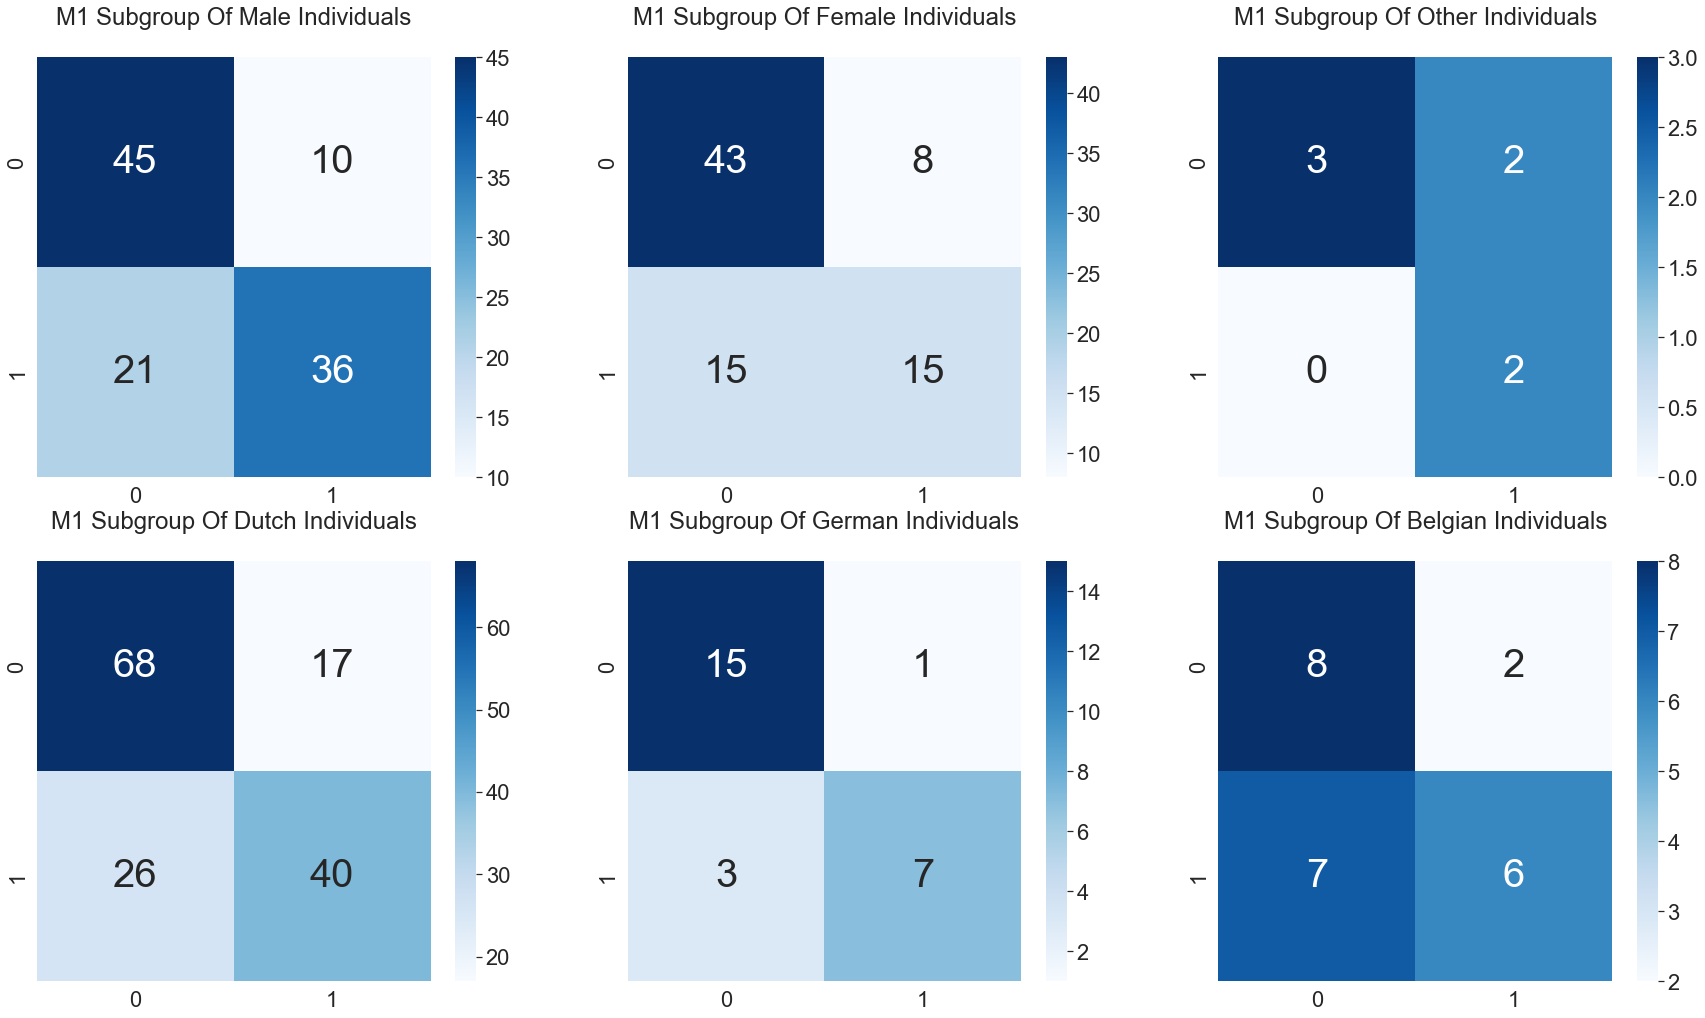

In [23]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(2, 3, figsize=(30,17))
sns.heatmap(males_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 0],annot_kws={'fontsize': 40})
ax[0, 0].set_title('M1 Subgroup Of Male Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(females_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 1],annot_kws={'fontsize': 40})
ax[0, 1].set_title('M1 Subgroup Of Female Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(others_cf_matrix, annot=True, cmap='Blues', ax=ax[0, 2],annot_kws={'fontsize': 40})
ax[0, 2].set_title('M1 Subgroup Of Other Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(dutch_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 0],annot_kws={'fontsize': 40})
ax[1, 0].set_title('M1 Subgroup Of Dutch Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(german_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 1],annot_kws={'fontsize': 40})
ax[1, 1].set_title('M1 Subgroup Of German Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(belgian_cf_matrix, annot=True, cmap='Blues', ax=ax[1, 2],annot_kws={'fontsize': 40})
ax[1, 2].set_title('M1 Subgroup Of Belgian Individuals\n')

Text(0.5, 1.0, 'M1 Subgroup Of Belgian Individuals\n')

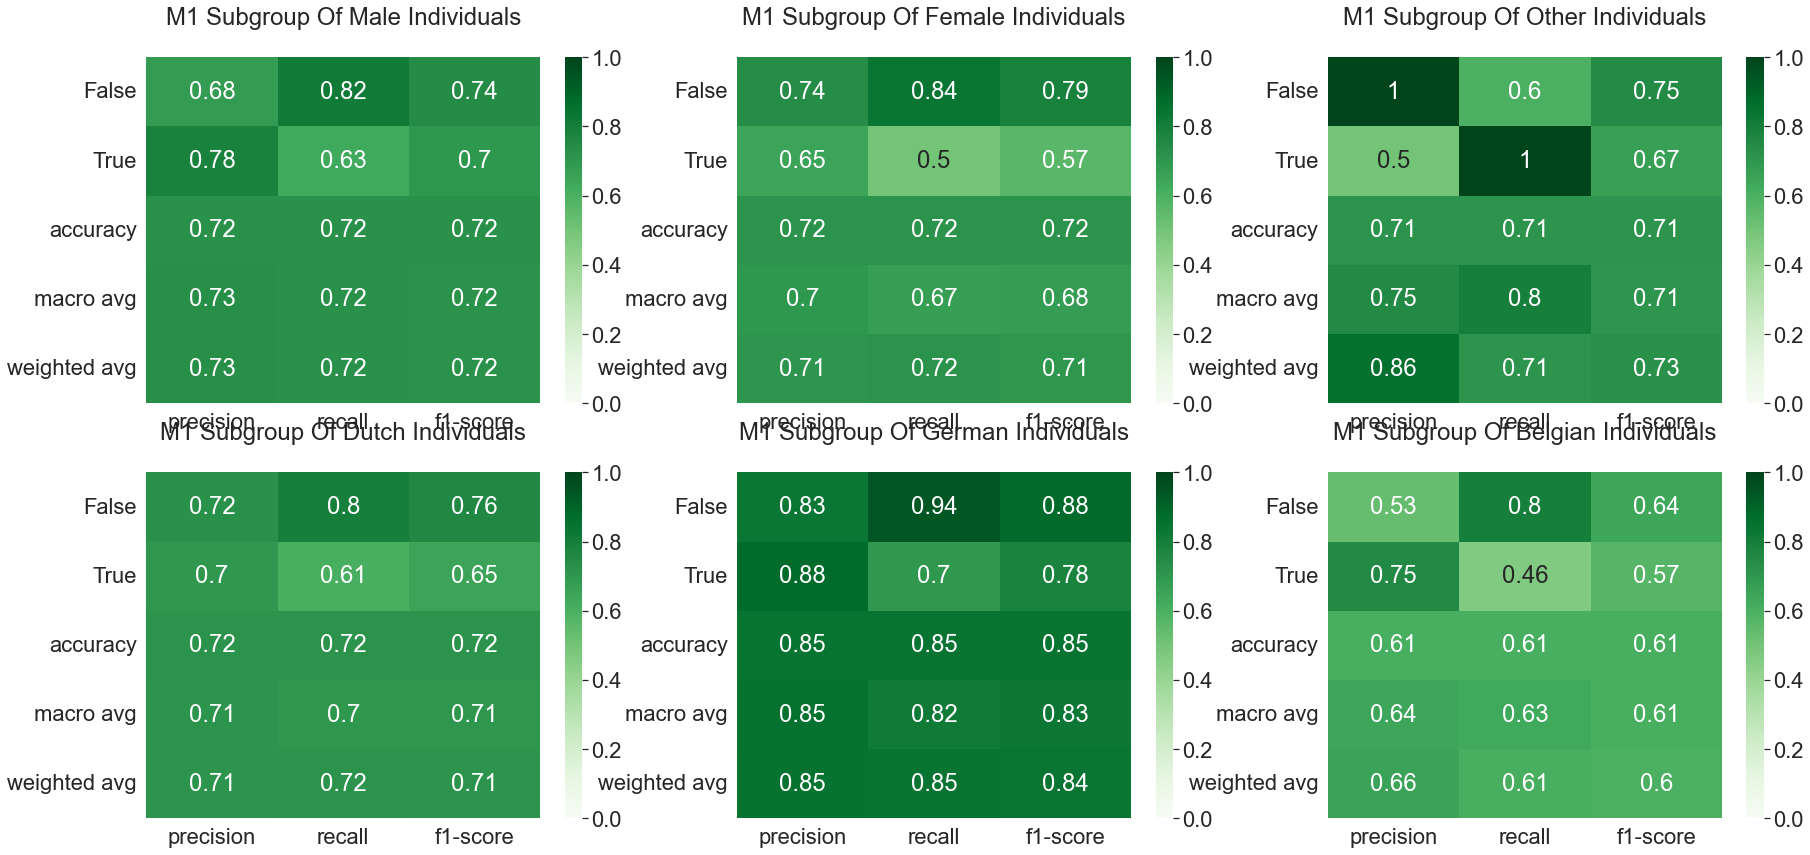

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(30,14))
sns.heatmap(pd.DataFrame(males_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 0])
ax[0, 0].set_title('M1 Subgroup Of Male Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(females_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 1])
ax[0, 1].set_title('M1 Subgroup Of Female Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(others_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[0, 2])
ax[0, 2].set_title('M1 Subgroup Of Other Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(dutch_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 0])
ax[1, 0].set_title('M1 Subgroup Of Dutch Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(german_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 1])
ax[1, 1].set_title('M1 Subgroup Of German Individuals\n')
# Display the visualization of the Classification Report.
sns.heatmap(pd.DataFrame(belgian_clf_report).iloc[:-1, :].T, cmap='Greens', annot=True, vmin=0, vmax=1, ax=ax[1, 2])
ax[1, 2].set_title('M1 Subgroup Of Belgian Individuals\n')

In [25]:
import random
genders = ['male', 'female', 'other']
nationalities = ['Dutch', 'German', 'Belgian']
# Subgroup of Ducth Male Individuals
are_male = test_set['gender'] == 'male'
are_male_df = test_set[are_male]
are_male_Dutch = are_male_df['nationality']=='Dutch'
are_male_Dutch_df = are_male_df[are_male_Dutch]
are_male_Dutch_x_test = are_male_Dutch_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_male_Dutch_y_test = are_male_Dutch_df["decision"]
are_male_Dutch_prediction = M1.predict(are_male_Dutch_x_test)
are_male_Dutch_cf_matrix = confusion_matrix(are_male_Dutch_y_test,are_male_Dutch_prediction)
are_male_Dutch_clf_report = classification_report(are_male_Dutch_y_test,are_male_Dutch_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of German Male Individuals
are_male = test_set['gender'] == 'male'
are_male_df = test_set[are_male]
are_male_German = are_male_df['nationality']=='German'
are_male_German_df = are_male_df[are_male_German]
are_male_German_x_test = are_male_German_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_male_German_y_test = are_male_German_df["decision"]
are_male_German_prediction = M1.predict(are_male_German_x_test)
are_male_German_cf_matrix = confusion_matrix(are_male_German_y_test,are_male_German_prediction)
are_male_German_clf_report = classification_report(are_male_German_y_test,are_male_German_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of Belgian Male Individuals
are_male = test_set['gender'] == 'male'
are_male_df = test_set[are_male]
are_male_Belgian = are_male_df['nationality']=='Belgian'
are_male_Belgian_df = are_male_df[are_male_Belgian]
are_male_Belgian_x_test = are_male_Belgian_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_male_Belgian_y_test = are_male_Belgian_df["decision"]
are_male_Belgian_prediction = M1.predict(are_male_Belgian_x_test)
are_male_Belgian_cf_matrix = confusion_matrix(are_male_Belgian_y_test,are_male_Belgian_prediction)
are_male_Belgian_clf_report = classification_report(are_male_Belgian_y_test,are_male_Belgian_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of Ducth Female Individuals
are_female = test_set['gender'] == 'female'
are_female_df = test_set[are_female]
are_female_Dutch = are_female_df['nationality']=='Dutch'
are_female_Dutch_df = are_female_df[are_female_Dutch]
are_female_Dutch_x_test = are_female_Dutch_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_female_Dutch_y_test = are_female_Dutch_df["decision"]
are_female_Dutch_prediction = M1.predict(are_female_Dutch_x_test)
are_female_Dutch_cf_matrix = confusion_matrix(are_female_Dutch_y_test,are_female_Dutch_prediction)
are_female_Dutch_clf_report = classification_report(are_female_Dutch_y_test,are_female_Dutch_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of German Female Individuals
are_female = test_set['gender'] == 'female'
are_female_df = test_set[are_female]
are_female_German = are_female_df['nationality']=='German'
are_female_German_df = are_female_df[are_female_German]
are_female_German_x_test = are_female_German_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_female_German_y_test = are_female_German_df["decision"]
are_female_German_prediction = M1.predict(are_female_German_x_test)
are_female_German_cf_matrix = confusion_matrix(are_female_German_y_test,are_female_German_prediction)
are_female_German_clf_report = classification_report(are_female_German_y_test,are_female_German_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of Belgian Female Individuals
are_female = test_set['gender'] == 'female'
are_female_df = test_set[are_female]
are_female_Belgian = are_female_df['nationality']=='Belgian'
are_female_Belgian_df = are_female_df[are_female_Belgian]
are_female_Belgian_x_test = are_female_Belgian_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_female_Belgian_y_test = are_female_Belgian_df["decision"]
are_female_Belgian_prediction = M1.predict(are_female_Belgian_x_test)
are_female_Belgian_cf_matrix = confusion_matrix(are_female_Belgian_y_test,are_female_Belgian_prediction)
are_female_Belgian_clf_report = classification_report(are_female_Belgian_y_test,are_female_Belgian_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of Dutch Other Individuals
are_other = test_set['gender'] == 'other'
are_other_df = test_set[are_other]
are_other_Dutch = are_other_df['nationality']=='Dutch'
are_other_Dutch_df = are_other_df[are_other_Dutch]
are_other_Dutch_x_test = are_other_Dutch_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_other_Dutch_y_test = are_other_Dutch_df["decision"]
are_other_Dutch_prediction = M1.predict(are_other_Dutch_x_test)
are_other_Dutch_cf_matrix = confusion_matrix(are_other_Dutch_y_test,are_other_Dutch_prediction)
are_other_Dutch_clf_report = classification_report(are_other_Dutch_y_test,are_other_Dutch_prediction, output_dict=True, target_names=['False', 'True'])
# Subgroup of German Other Individuals
are_other = test_set['gender'] == 'other'
are_other_df = test_set[are_other]
are_other_German = are_other_df['nationality']=='German'
are_other_German_df = are_other_df[are_other_German]
are_other_German_x_test = are_other_German_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_other_German_y_test = are_other_German_df["decision"]
are_other_German_prediction = M1.predict(are_other_German_x_test)
are_other_German_cf_matrix = confusion_matrix(are_other_German_y_test,are_other_German_prediction)
are_other_German_clf_report = classification_report(are_other_German_y_test,are_other_German_prediction, output_dict=True, target_names=['True'])
# Subgroup of Belgian Other Individuals
are_other = test_set['gender'] == 'other'
are_other_df = test_set[are_other]
are_other_Belgian = are_other_df['nationality']=='Belgian'
are_other_Belgian_df = are_other_df[are_other_Belgian]
are_other_Belgian_x_test = are_other_Belgian_df.loc[:, ["master","phd","bachelor",'ind-languages', 'ind-debateclub', 'ind-entrepeneur_exp']]
are_other_Belgian_y_test = are_other_Belgian_df["decision"]
are_other_Belgian_prediction = M1.predict(are_other_Belgian_x_test)
are_other_Belgian_cf_matrix = confusion_matrix(are_other_Belgian_y_test, are_other_Belgian_prediction)
are_other_Belgian_clf_report = classification_report(are_other_Belgian_y_test,are_other_Belgian_prediction, output_dict=True, target_names=['True'])

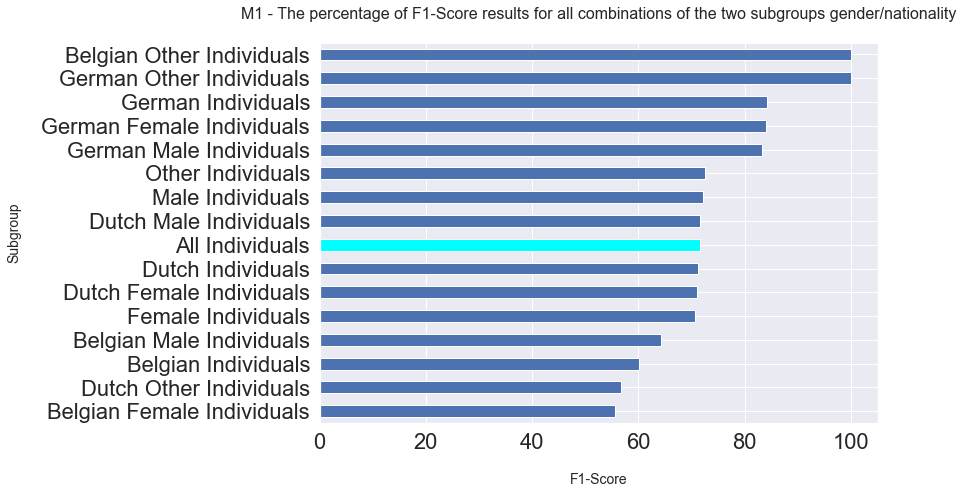

In [26]:
# Create new dictionary for all the results of combinations for the two subgroups gender/nationality
sub_dict ={}
sub_dict['All Individuals'] = clf_report4['weighted avg']['f1-score'] * 100
sub_dict['Male Individuals'] = males_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Female Individuals'] = females_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Other Individuals'] = others_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Individuals'] = dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Individuals'] = german_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Individuals'] = belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Male Individuals'] = are_male_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Male Individuals'] =are_male_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Male Individuals'] =are_male_Belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Female Individuals'] =are_female_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Female Individuals'] =are_female_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Female Individuals'] =are_female_Belgian_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Dutch Other Individuals'] =are_other_Dutch_clf_report['weighted avg']['f1-score'] * 100
sub_dict['German Other Individuals'] =are_other_German_clf_report['weighted avg']['f1-score'] * 100
sub_dict['Belgian Other Individuals'] =are_other_Belgian_clf_report['weighted avg']['f1-score'] * 100
# Create a dataframe from the dictionary
sub_df = pd.DataFrame(list(sub_dict.items()),columns = ['Subgroup', 'F1-Score']) 
# Sort the values based on their F1-scores
sub_df.sort_values('F1-Score',inplace=True)
# Plot a horizontal bar chart to better show the subgroups who are at a disadvantage
colors = ['b','b','b','b','b','b','b','cyan','b','b','b','b','b','b','b']
ax = sub_df.plot.barh(x='Subgroup', y='F1-Score', figsize=(10,7), color = colors)
ax.set_title('M1 - The percentage of F1-Score results for all combinations of the two subgroups gender/nationality\n', fontsize= 16)
ax.set_ylabel('Subgroup\n', fontsize= 14)
ax.set_xlabel('\nF1-Score', fontsize= 14)

ax.get_legend().remove()

END OF KNN